# "2020 March One Day Holding Long Short Portfolio BackTest"
> "2020 March Portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [25]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [26]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20204dayreturnpred2019train60K.csv')

In [27]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20200301].loc[df_testp.Date<20200401].sort_values(by='Date',ascending=True).copy()

**Long-Short Portfolio**

In [28]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20200302,-1.0,-14.471081,1.000000
1,20200302,1.0,-255.633370,0.855289
2,20200303,1.0,112.227150,-1.331115
3,20200304,-1.0,2.018843,-2.824988
4,20200304,1.0,-45.179325,-2.882020
5,20200305,-1.0,-5.012451,-1.579943
6,20200305,1.0,-94.643940,-1.500749
7,20200306,-1.0,-25.000000,-0.080381
8,20200306,1.0,-400.407281,-0.060286
9,20200309,-1.0,0.000000,0.181103


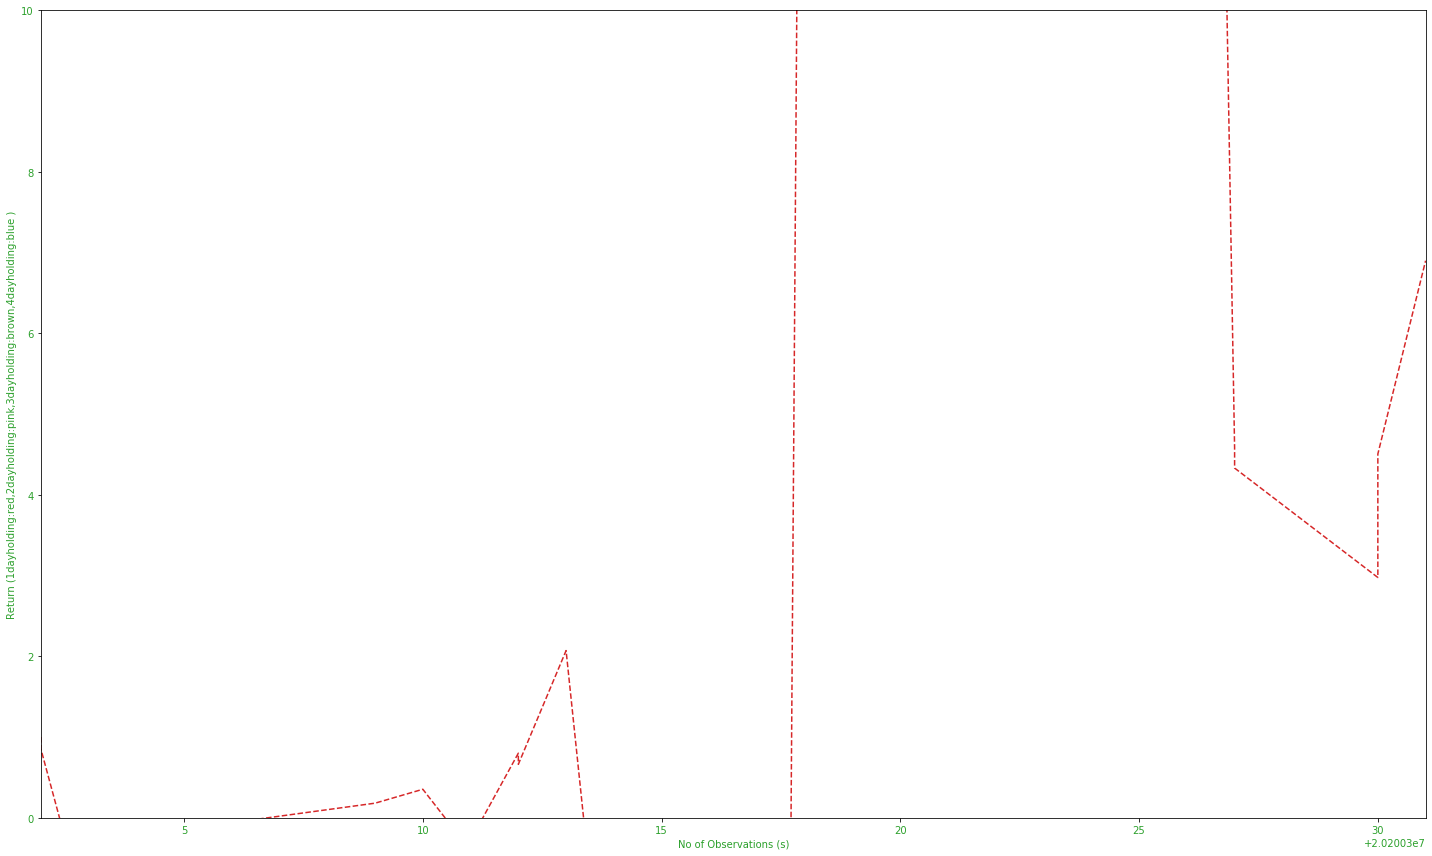

In [30]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Long portfolio**

In [31]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20200302,1.0,-255.633370,1.000000
1,20200303,1.0,112.227150,-1.556334
2,20200304,1.0,-45.179325,-3.302963
3,20200305,1.0,-94.643940,-1.810706
4,20200306,1.0,-400.407281,-0.096983
5,20200309,1.0,95.110452,0.291343
6,20200310,1.0,-215.118800,0.568440
7,20200311,1.0,-390.120174,-0.654381
8,20200312,1.0,212.663398,1.898492
9,20200313,1.0,-819.600701,5.935888


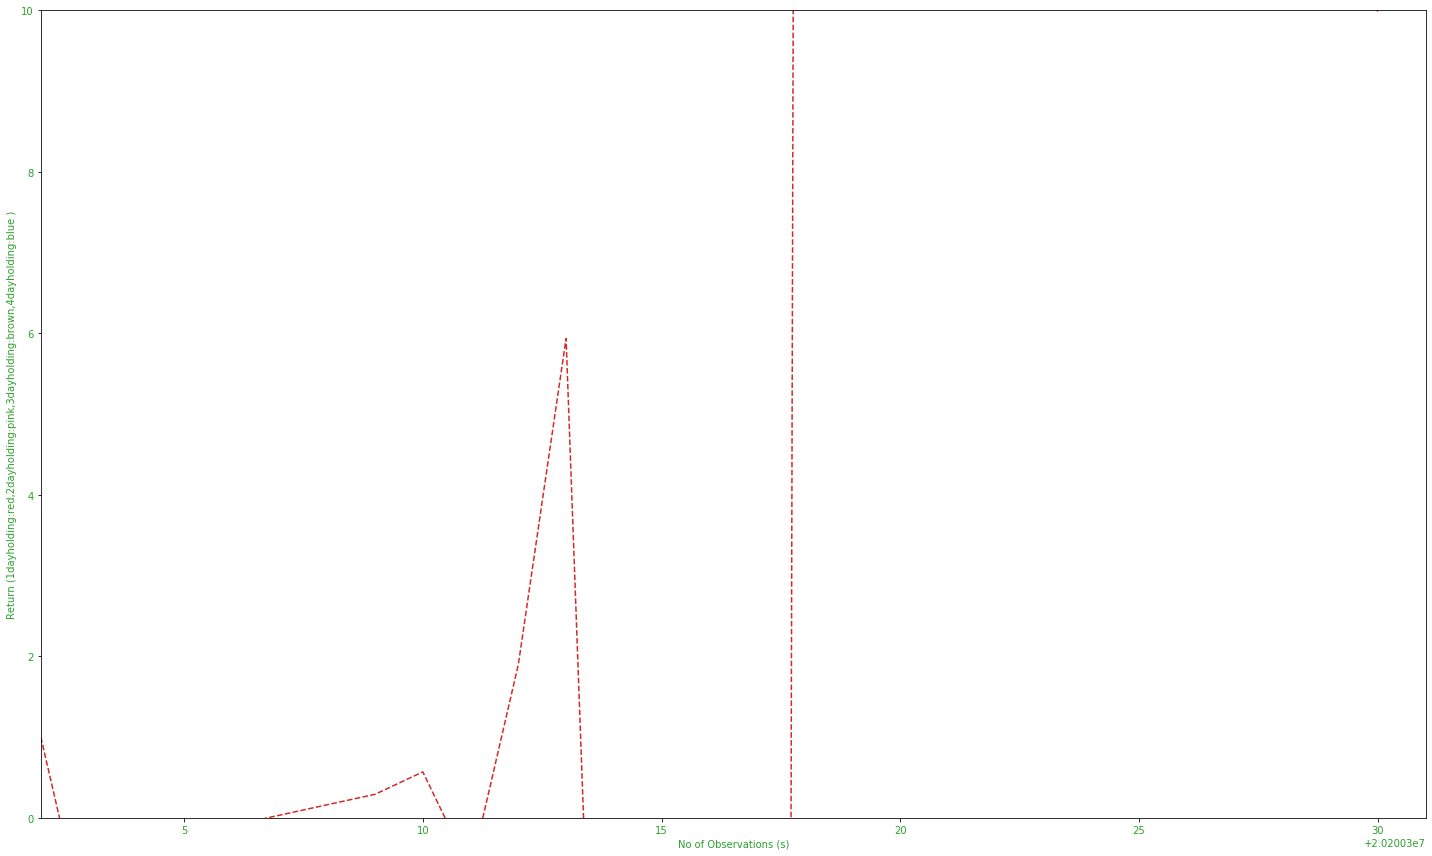

In [33]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Short Portfolio**

In [34]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==-1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20200302,-1.0,-14.471081,1.000000
1,20200304,-1.0,2.018843,0.855289
2,20200305,-1.0,-5.012451,0.872556
3,20200306,-1.0,-25.000000,0.828820
4,20200309,-1.0,0.000000,0.621615
5,20200311,-1.0,-32.196228,0.621615
6,20200312,-1.0,-17.224829,0.421478
7,20200316,-1.0,7.078193,0.348879
8,20200319,-1.0,-2.531646,0.373574
9,20200323,-1.0,-6.618532,0.364116


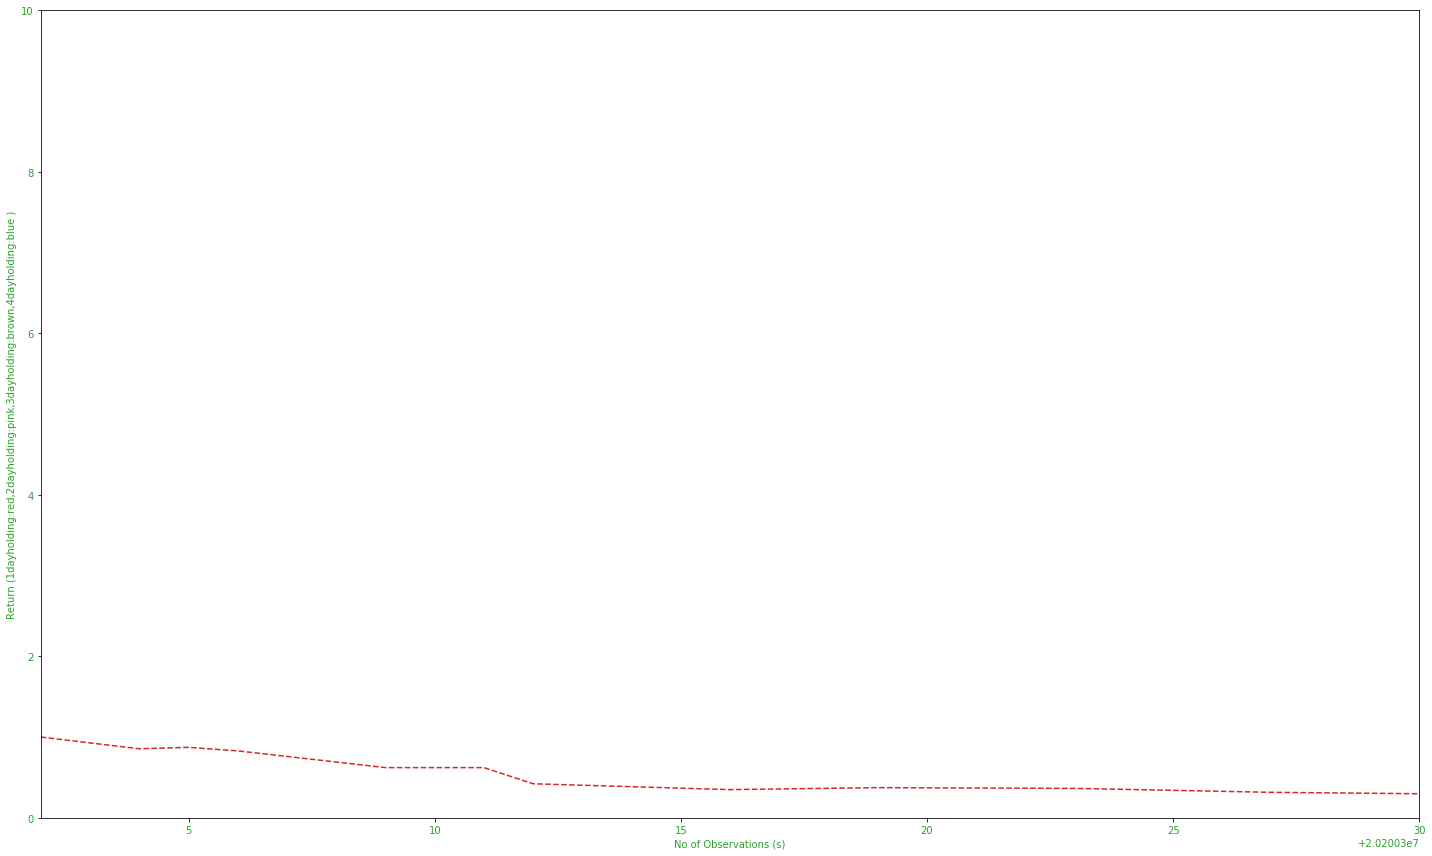

In [36]:
#hide
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()